In [135]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# **Telecommunication company customer churn prediction using different machine leargning algorithms for classifying**

## **ABSTRACT**
In this paper (will be finished once i know exactly what approach is available to take)

## **1.Introduction**

Customer churn, defined as the act of customers discontinuing their service [1], is a significant challenge faced by the telecommunications industry, where retaining existing customers is often more cost-effective than acquiring new ones [2]. Churn refers to the number of customers who leave a service provider over a certain period [3], and predicting which customers are likely to churn is critical to minimizing revenue losses [4]. The goal of churn prediction is to identify potential churners early, so that businesses can take proactive steps, such as offering personalized incentives and retention strategies, to keep them.

Telecom companies face high acquisition costs compared to retention costs [2], and predicting churn accurately can prevent the misallocation of resources. When the prediction of churn is incorrect, companies may waste money on customers who would not have left, while missing opportunities to retain those who were actually at risk. Studies show that acquisition costs can be up to five times higher than retention costs [5], making it crucial to target the right customers with retention efforts.

With the rise of popularity of data-driven solutions, machine learning has emerged as a powerful tool to predict customer churn [6] based on historical data. By analyzing patterns in customer behavior, service usage, billing information, and other relevant factors like demographic features and more, machine learning models can provide insights that were previously difficult to capture through traditional methods. These predictive models allow businesses to effectively target at-risk customers, offering retention campaigns before the churn occurs [7].Using algorithms such as Random Forests, Support Vector Machines (SVM), Decision Trees and more, companies could gain valuable insights into customer behavior and identify the key factors that drive churn. Accurate churn prediction models can enable telecom companies to reduce churn rates, increase customer loyalty, and enhance profitability. [8]

In addition to improving churn prediction, feature selection and the identification of relevant factors that influence churn may be critical for building effective models. [9] Telecom customers churn for a variety of reasons, and these factors should be considered to develop personalized retention strategies. Machine learning models allow for a more realistic and targeted approach, splitting customers based on their churn risk and offering the companies to develop customized solutions to prevent them from leaving.

This project aims to explore the factors that lead to customer churn in order to allocate resources on their improvement or to gain knowledge on where the resources could be spared and to develop a churn prediction model using machine learning algorithms, with the goal of helping telecom companies predict customer churn and improve customer retention strategies. For that we will be trying different ML algorithms in order to find and tune the best model for our goal - to find out which customers would churn so that resources and strategies are built for their retention and which wouldn't so that resources aren't misallocated into retaining a non churner.

## **2. Related work**

Numerous studies have addressed the problem of telecom customer churn prediction using various machine learning techniques. These works often focus on data preprocessing, feature selection, the application of multiple classifiers, and different evaluation metrics.

Data Preprocessing and Feature Engineering:
Data preprocessing plays a crucial role in telecom churn prediction. Ullah et al. (2019) [9] employed noise removal and feature selection as part of their preprocessing strategy, along with k-means clustering for customer segmentation. Wagh et al. (2023) [10] also applied robust preprocessing techniques and utilized Pearson correlation for feature selection, while further addressing data imbalance using SMOTE and ENN methods. Similarly, Poudel et al. (2024) [11] implemented feature engineering and one-hot encoding for categorical variables. Each of these studies emphasizes the importance of preprocessing in improving model performance.

Machine Learning Models:
A wide range of machine learning models have been applied to predict customer churn. Ullah et al. (2019) [9] compared multiple classifiers, including Random Forest, Decision Tree, Naive Bayes, Multilayer Perceptron (MLP), and Logistic Regression, and used rule-based algorithms for churn factor identification. Wagh et al. (2023) [10] applied Random Forest and Decision Tree for classification tasks, while also utilizing survival analysis techniques such as Cox Proportional Hazard Models and Kaplan-Meier analysis, which bring a unique angle to churn prediction by predicting customer survival rates.
Poudel et al. (2024) [11] explored various models such as SVM, Logistic Regression, Random Forest, Gradient Boosting Machine (GBM), and Neural Networks, demonstrating that ensemble models like Random Forest and GBM often outperform traditional classifiers. Similarly, Ahmed and Maheswari (2017) [12] integrated a hybrid Firefly algorithm with Simulated Annealing to improve the efficiency of classification on large telecom datasets.
Jain et al. (2020) [13] applied Logistic Regression and Logit Boost algorithms and emphasized the simplicity and efficiency of these models for churn prediction.

Evaluation Metrics:
Evaluation methods across these studies vary widely, reflecting the different goals and complexities of churn prediction. Ullah et al. (2019) [9] evaluated their models using standard metrics like accuracy and ROC area, which are commonly used for binary classification. Ahmed and Maheswari (2017) [12] took a more comprehensive approach by using metrics like ROC, Precision-Recall, F-Measure, and accuracy, while Jain et al. (2020) [13] used Kappa statistic, Mean Absolute Error, and Root Mean Square Error in addition to accuracy.
Poudel et al. (2024) [11] employed 10-fold cross-validation, a robust method for assessing model generalizability, and added interpretability to their model evaluations by using SHAP (SHapley Additive Explanations) plots, which provide insights into both global and local prediction explanations. This integration of interpretability techniques highlights an increasing trend towards explainable AI in churn prediction models.

While several studies have successfully applied traditional machine learning techniques like Random Forest, Logistic Regression, and Decision Trees, recent works are also integrating advanced methodologies, such as survival analysis and hybrid algorithms, to enhance model performance. My work aims to build on these approaches by combining some of the methods and trying new approaches like ensemble stacking.

## **3.Data acquisition and cleaning**

### **Data acquisition**

The data is acquired through Kaggle and it's free for use. This dataset contains detailed information about customers of a telecom company, including demographics, service subscriptions, billing information, and churn status. It captures key aspects such as whether a customer has phone or internet services, their tenure with the company, usage of additional services like online security, and their chosen payment methods. The dataset is particularly useful for analyzing patterns and factors that contribute to customer churn, helping the company understand and potentially mitigate reasons for customer departure. [14]

Telecom Customers, By: Turek Muhammed, License: Apache 2.0, Name of file: Telecom Customers Churn.csv   Link: https://www.kaggle.com/datasets/tarekmuhammed/telecom-customers/data

To note: Only Wagh et al. (2023) [10] from the above mentioned has worked on the same dataset.

About the data:


### **Data cleaning**

1. First let's read the dataset using Pandas's read_csv function, see the shape of it (observations and features) and it's columns and potential problems like missing values, duplicates and check the data constistency(whether a numeric feature is indeed in an numeric datatype).

In [14]:
telecom_data = pd.read_csv("Telecom Customers Churn.csv")

2. Let's see the DataFrame and the shape of the data to gain some knowledge on what the data looks like.

In [16]:
telecom_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [17]:
telecom_data.shape

(7043, 21)

3. As it can be seen the dataset has 7043 observations(rows) and 21 features(columns), from which the column "Churn" is the target variable.

In [19]:
telecom_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

4. The names of the columns could be transformed into snake_case for easier usage. I will create a function to transform the column names into snake_case

In [21]:
def convert_to_snake_case(column_name):
    """
    Convert a string to snake_case.

    Parameters:
    column_name (str): The original column name.

    Returns:
    str: The column name converted to snake_case.
    """
  
    snake_case_name = re.sub(r'[\W\s]+', '_', column_name)
    
   
    snake_case_name = re.sub(r'(?<!^)(?=[A-Z])', '_', snake_case_name)
    

    snake_case_name = snake_case_name.lower()
    
   
    snake_case_name = re.sub(r'_+', '_', snake_case_name)
    
   
    snake_case_name = snake_case_name.strip('_')
    
    return snake_case_name

def rename_columns_to_snake_case(df):
    """
    Rename all columns in a DataFrame to snake_case.

    Parameters:
    df (pd.DataFrame): The DataFrame whose columns need to be renamed.

    Returns:
    pd.DataFrame: A new DataFrame with columns renamed to snake_case.
    """
    
    column_mapping = {col: convert_to_snake_case(col) for col in df.columns}
    
    
    df_snake_case = df.rename(columns=column_mapping)
    
    return df_snake_case

In [22]:
telecom_customer_data_snake_case = rename_columns_to_snake_case(telecom_data)

5. Let's see the result and whether all columns transformed

In [24]:
telecom_customer_data_snake_case

,customer_i_d,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_t_v,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [25]:
telecom_customer_data_snake_case.columns

Index(['customer_i_d', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_t_v', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn'],
      dtype='object')

6. Now that all the columns are renamed let's continue onward with checking for NaN values, duplicates and datatype consistency

In [27]:
telecom_customer_data_snake_case.isnull().sum()

customer_i_d         0
gender               0
senior_citizen       0
partner              0
dependents           0
tenure               0
phone_service        0
multiple_lines       0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_t_v        0
streaming_movies     0
contract             0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
churn                0
dtype: int64

7. Apparently no NaN values are found, let's check for duplicates.

In [29]:
telecom_customer_data_snake_case.duplicated().sum()

0

8. No duplicates found aswell, let's now see if the data types are right

In [31]:
telecom_customer_data_snake_case.dtypes

customer_i_d          object
gender                object
senior_citizen         int64
partner               object
dependents            object
tenure                 int64
phone_service         object
multiple_lines        object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_t_v         object
streaming_movies      object
contract              object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges         object
churn                 object
dtype: object

9. All clooks okay except for total_charges which is of type object which makes me think there is a null value or something that is not encoded right so I will look into it
10. I will create a function to display the unique values and their count in every column

In [33]:
def display_unique_values_and_counts(df):
    """
    Display unique values and their counts for each column in a DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame whose columns will be analyzed.
    
    Returns:
    None
    """
    for column in df.columns:
        print(f"Column: {column}")
        print(df[column].value_counts(dropna = False))
        print("-" * 50)  


display_unique_values_and_counts(telecom_customer_data_snake_case)

Column: customer_i_d
customer_i_d
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
--------------------------------------------------
Column: gender
gender
Male      3555
Female    3488
Name: count, dtype: int64
--------------------------------------------------
Column: senior_citizen
senior_citizen
0    5901
1    1142
Name: count, dtype: int64
--------------------------------------------------
Column: partner
partner
No     3641
Yes    3402
Name: count, dtype: int64
--------------------------------------------------
Column: dependents
dependents
No     4933
Yes    2110
Name: count, dtype: int64
--------------------------------------------------
Column: tenure
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
---------

11. Here we can see that 11 of the total_charge entries are blank that's why it doesn't count them as null, but they arent numbers either, so I shall remove them, but let's make sure 

In [35]:
telecom_customer_data_snake_case['total_charges'] = pd.to_numeric(telecom_customer_data_snake_case['total_charges'], errors='coerce')
total_charges_issues = telecom_customer_data_snake_case['total_charges'].isnull().sum()
print(f"Number of invalid 'TotalCharges' entries: {total_charges_issues}")

Number of invalid 'TotalCharges' entries: 11


12. Let's drop these nan values

In [37]:
telecom_customer_data_cleaned_nan = telecom_customer_data_snake_case.dropna(subset=['total_charges'])

In [38]:
telecom_customer_data_cleaned_nan 

,customer_i_d,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_t_v,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


12. Let's remove the customer_i_d column as it doesn't provide any valuable information 

In [40]:
telecom_data_cleaned = telecom_customer_data_cleaned_nan.drop(['customer_i_d'], axis=1,).reset_index(drop=True)

In [41]:
telecom_data_cleaned

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_t_v,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


13. Let's check if everything is good now just to make sure. Check for Nan, Dtypes and duplicates

In [43]:
telecom_data_cleaned.isnull().sum()

gender               0
senior_citizen       0
partner              0
dependents           0
tenure               0
phone_service        0
multiple_lines       0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_t_v        0
streaming_movies     0
contract             0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
churn                0
dtype: int64

In [44]:
telecom_data_cleaned.dtypes

gender                object
senior_citizen         int64
partner               object
dependents            object
tenure                 int64
phone_service         object
multiple_lines        object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_t_v         object
streaming_movies      object
contract              object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges        float64
churn                 object
dtype: object

In [45]:
telecom_data_cleaned.duplicated().sum()

22

14. Now there are duplicate values, let's remove them 

In [47]:
telecom_data_cleaned_no_duplicates = telecom_data_cleaned.drop_duplicates()

In [48]:
telecom_data_cleaned_no_duplicates.reset_index(drop=True, inplace=True)

In [49]:
telecom_data_cleaned_no_duplicates

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_t_v,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7005,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7006,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7007,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7008,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


15. Now the data should be ready for EDA 

## **4.Exploratory Data Analysis**

1. Let's first begin by checking the statistical summary of the numerical variables 

In [53]:
telecom_data_cleaned_no_duplicates.describe()

,senior_citizen,tenure,monthly_charges,total_charges
count,7010.000000,7010.000000,7010.000000,7010.000000
mean,0.162767,32.520399,64.888666,2290.353388
std,0.369180,24.520441,30.064769,2266.820832
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,408.312500
50%,0.000000,29.000000,70.400000,1403.875000
75%,0.000000,56.000000,89.900000,3807.837500
max,1.000000,72.000000,118.750000,8684.800000


2. Here we can see that senior_citizen is also described as it's numerical, it's binary (0 and 1), but with that we can still see that:
- around 16.3% of the customers are senior citizens and standard deviation of 37 is considerably typical having in mind it's a binary feature.

3. For tenure (duration of the customers usage of the services):
- The mean of 32.52 months indicates that ,on average, customers have stayed with the service for around 2.7 years(clearly mathematicaly calculated) or in other words 2 years and 8 months(by rough calculations)
- The standard deviation is 24.52, suggesting a wide range in customer tenure.
- The minimum tenure is 1 month, and the maximum is 72 months, meaning the longest tenure in this dataset is 6 years.
- The 25th percentile is 9 months, meaning 25% of customers have a tenure of less than 9 months.
- The median (50th percentile) is 29 months, meaning half of the customers have a tenure shorter than 29 months, and half have longer.
- The 75th percentile is 56 months, indicating that 75% of customers have been with the service for less than 56 months
- The data shows that the customer base includes a mix of short-term and long-term customers, with more concentration on either very short or longer-term relationships (suggesting potential churn concerns among newer customers).

4. For montly charges:
- The mean monthly charge is around 64.89
- The standard deviation is 30.06, meaning that most customers' monthly charges vary by about 30 above or below the mean. This suggests a broad spread in how much customers are paying, indicating different service levels or pricing plans.
- The minimum charge is 18.25, which could mean the customer subscribed to minimal or basic services.
- The maximum charge is 118.75, which could mean the customer subscribed to most not if all services. 
- The 25th percentile is 35.75, meaning 25% of customers are paying less than 35.75 per month.
- Half of the customers are paying less than 70.40 and the other half are paying more.
- 75% of customers are paying less than 89.90, meaning the top 25% of customers are paying more than 89.90. Which could mean they use many or most of the services provided.

5. For total charges:
- The mean is 2290.35, which represents the cumulative amount a customer has paid to the company.
- The standard deviation of 2266.82 shows that there is a wide variance in total charges. This means some customers have only paid a small amount, while others have paid significantly more over their time with the company.
- Minimum: The lowest total charge is 18.80, which likely corresponds to a new or very short-term customer who has only recently subscribed.
- Maximum: The highest total charge is 8684.80, which likely represents long-term customers who have been paying for an extended period (with premium services or high monthly charges).
- 25th Percentile (408.31): A quarter of the customers have total charges of less than 408.31, meaning these could be newer customers or those paying for less services.
- Median (50th Percentile = 1403.87): Half of the customers have paid less than 1403.87 and the other half have paid more. This suggests that many customers have been the company long enough to accumulate substantial charges.
- 75th Percentile (3807.83): 75% of customers have paid less than 3807.83, meaning the top 25% of customers have paid more than 3807.83. These customers are likely long-term or users that have subscribed for most of the company's services.
- The large spread between the minimum and maximum total charges indicates that the dataset includes both new and long-term customers
- The high standard deviation (2266.82) and wide range suggest that total charges are influenced by both customer tenure and monthly charges. (Total charges = monthly charges * tenure) - this will be tested

6. In conclusion to this statistical summary:
- The data distribution for tenure and total charges shows a mix of new and long-term customers, indicating variability in customer relationships.
- Monthly charges are diverse, which could suggest different pricinng based on the services included. (I will try to explore this to see whether the price differentiates because of services)
- The statistics for senior citizens suggest a relatively small percentage of customers fall into this category.

7. Let' see if there aren't any outliers in the numerical variables and see how they are distributed and how do they correlate with the target variable churn and then we will proceed with exploring the categorical variables and also see if the different services increase the monthly costs
8. I will begin by creating a box plot for each numerical feature in order to find outliers

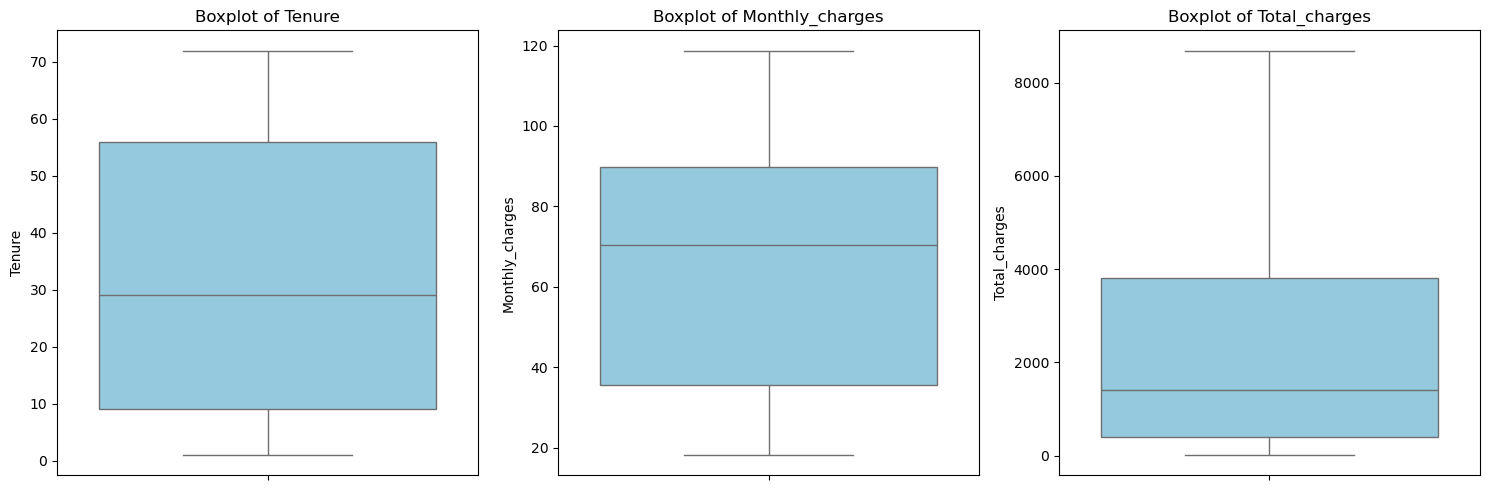

In [55]:
numerical_features = ['tenure', 'monthly_charges', 'total_charges']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=telecom_data_cleaned_no_duplicates[feature], color='skyblue')
    plt.title(f'Boxplot of {feature.capitalize()}')
    plt.ylabel(feature.capitalize())

plt.tight_layout()
plt.show()

9. After seeing the boxplots:
- Tenure: The box plot for tenure shows a fairly even distribution of customer tenure, ranging from 1 to 72 months. There don't appear to be any significant outliers, as no points fall outside the whiskers.
- Monthly Charges: The distribution of monthly charges also looks relatively normal, with a spread from around 20 to 120. There are no significant outliers in this plot either, as no values fall beyond the whiskers.
- Total Charges: The total charges show a large range, as expected, due to the cumulative nature of the charges. There is a wide spread, but no obvious outliers beyond the upper whisker.

10. Now let's see the distribution of the numerical variables.

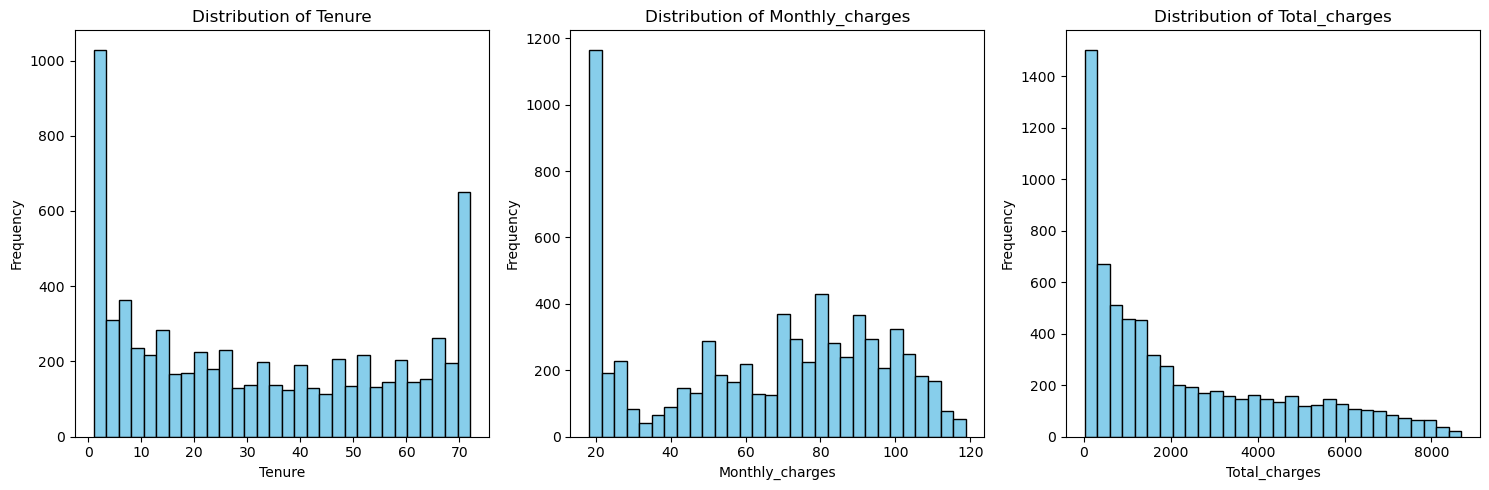

In [57]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    plt.hist(telecom_data_cleaned_no_duplicates[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

11. Tenure distribution:
- The distribution of tenure shows that a large number of customers have been with the company for very short periods (tenure close to 0). This suggests a high influx of newer customers, which could indicate high customer churn or many new sign-ups.
- There is also a significant number of customers with longer tenures, especially around the 70-month mark, suggesting long-term customer loyalty as well.
- The distribution is not a bell curve but rather bimodal, with peaks at the low and high ends of the tenure spectrum. This might indicate two types of customer behavior: a group that churns early and a group that stays longer.

12. Monthly charges distribution:
- The monthly charges distribution appears to be bimodal as well, with one large spike around the lower end (closer to 20) and another concentration around 70-80. This suggests that there may be two main service levels or customer groups: those paying for basic services and those opting for more services.
- The distribution is somewhat skewed, with some customers paying charges as high as 100+, but these are fewer in number.

13. Total charges distribution:
- The distribution of total charges is highly skewed to the right. This is expected since total charges accumulate over time, and customers with longer tenures and/or higher monthly charges will naturally have higher total charges.
- The majority of customers have total charges on the lower end (under 2000), but there are customers with total charges going as high as 8000+. This skew suggests that only a minority of customers contribute to the higher total charges.

14. Insights from the findings:
- Tenure: The data shows a strong presence of new or short-term customers (possibly due to churn), but there are also many long-term customers.
- Monthly Charges: There seems to be a split between low-tier and higher-tier services, with customers either paying around 20 or 70-80 monthly.
- Total Charges: Naturally skewed due to the cumulative nature of the feature, where total charges increase with both tenure and monthly charges.

15. Now let's quickly show the connection between total charges, tenure and monthly charges. As I previously stated, the column total charges is monthly charges * tenure (which looks self-explanatory but I still want to give proof.) For that I will create a new column that contains the result of the tenure * monthly charges multiplication wihtout adding it to the dataframe, then I will plot a scatter plot of total charges and the new column and add an regression line that will demonstrate the linear relationship between total charges and the product of tenure and monthly charges, which should align closely.

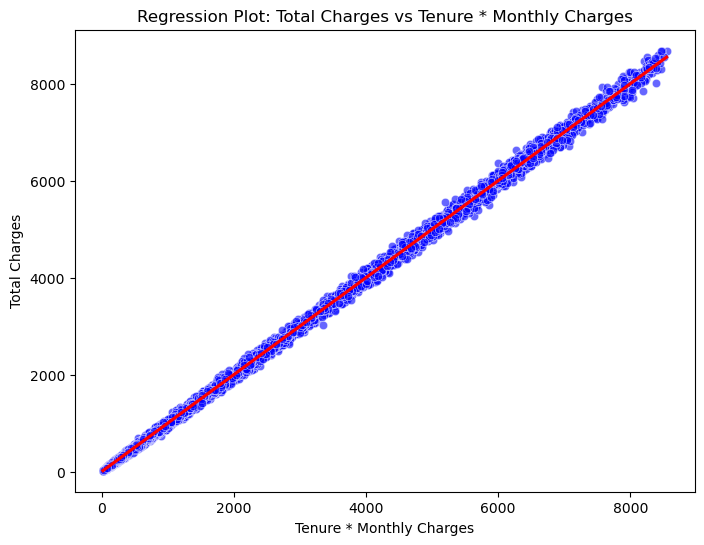

In [103]:
tenure_monthly = telecom_data_cleaned_no_duplicates['tenure'] * telecom_data_cleaned_no_duplicates['monthly_charges']
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tenure_monthly, y=telecom_data_cleaned_no_duplicates['total_charges'], color='blue', alpha=0.6)
sns.regplot(x=tenure_monthly, y=telecom_data_cleaned_no_duplicates['total_charges'], scatter=False, color='red')
plt.title('Regression Plot: Total Charges vs Tenure * Monthly Charges')
plt.xlabel('Tenure * Monthly Charges')
plt.ylabel('Total Charges')
plt.show()

16. After looking at the scatter plot we can see that:
- The data points (blue dots) form a very tight line along the red regression line.
- This shows a perfectly linear relationship between total charges and tenure * monthly charges, which is expected, as total charges are calculated as the cumulative sum of monthly payments over time (i.e., total charges = tenure monthly * charges).
- There is almost no visible deviation of the data points from the regression line, indicating that the relationship holds consistently for all customers.
- The regression line (red) fits the data points (blue) perfectly, with a slope of 1, which is expected for this relationship.
- Total charges are mathematically dependent on the product of tenure and monthly charges, and the regression plot demonstrates that this dependency holds strongly in the dataset.
- Outliers or deviations would suggest special circumstances, but in this case, the plot shows that total charges behave exactly as predicted by tenure and monthly charges.
- The plot confirms that total charges are a direct product of tenure and monthly charges. Customers' total payments are a simple accumulation of their monthly payments over their tenure with the service.
- There are no significant deviations or outliers, meaning the billing system seems to work as expected.

17. Now let's see how are the numerical columns correlated

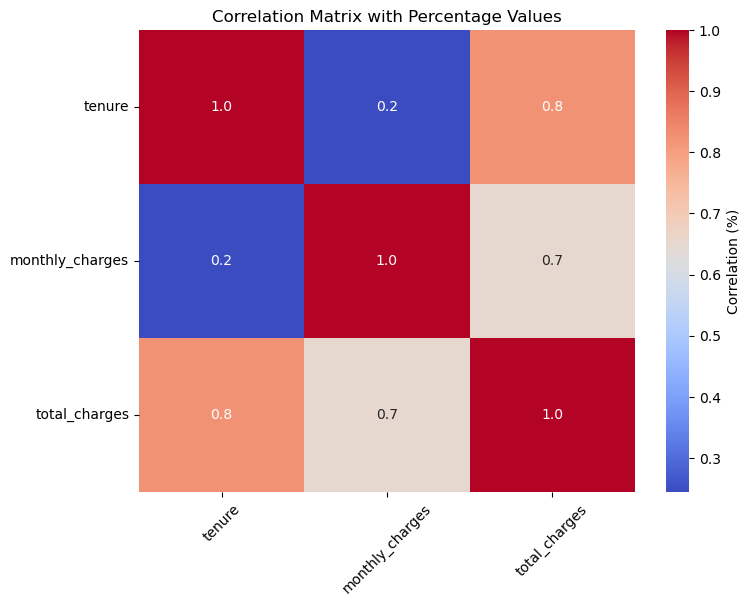

In [112]:
correlation_matrix = telecom_data_cleaned_no_duplicates[['tenure', 'monthly_charges', 'total_charges']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.1f', cmap='coolwarm', cbar_kws={'label': 'Correlation (%)'})
plt.title('Correlation Matrix with Percentage Values')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

18. After looking at the correlation matrix we can see that:
- Total charges are strongly correlated with both tenure and monthly charges, as you would expect in a subscription-based business.
- Tenure and monthly charges are not strongly related, suggesting that customers do not necessarily upgrade or downgrade their plans based on how long they stay with the service.
- The matrix shows reasonable relationships and is consistent with what you'd expect in telecom or subscription-based services, where customers' total charges grow with tenure and monthly billing.

Just to make sure of the integrity of my findings I will perform a multicolinearity check : The Variance Inflation Factor (VIF). VIF is a metric used to detect multicollinearity in numerical features, particularly when you are working with linear regression models. Multicollinearity occurs when two or more predictor variables in a model are highly correlated, leading to instability in the regression coefficients.


In [139]:
X = telecom_data_cleaned_no_duplicates[['tenure', 'monthly_charges', 'total_charges']]
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

           Feature       VIF
0           tenure  6.332530
1  monthly_charges  3.369231
2    total_charges  8.085845


VIF > 5: Indicates moderate to high multicollinearity. It’s generally considered a warning sign that the feature is highly correlated with other predictors.

VIF > 10: Indicates severe multicollinearity, and you should consider removing or transforming the feature because it might distort the model.

VIF = 1: Indicates no multicollinearity. The variable is independent of the others.

As it can be seen total_charges indicates high multicolinearity, which is understandable having in mind it's mathematically dependant, which in the long run could bring up some problems, so we might do something with that feature like remove it. 

19. Now let's see a churn analysis to explore how churn is influenced by key variables. This would lately be explored aswell using OLS regression(Maybe)

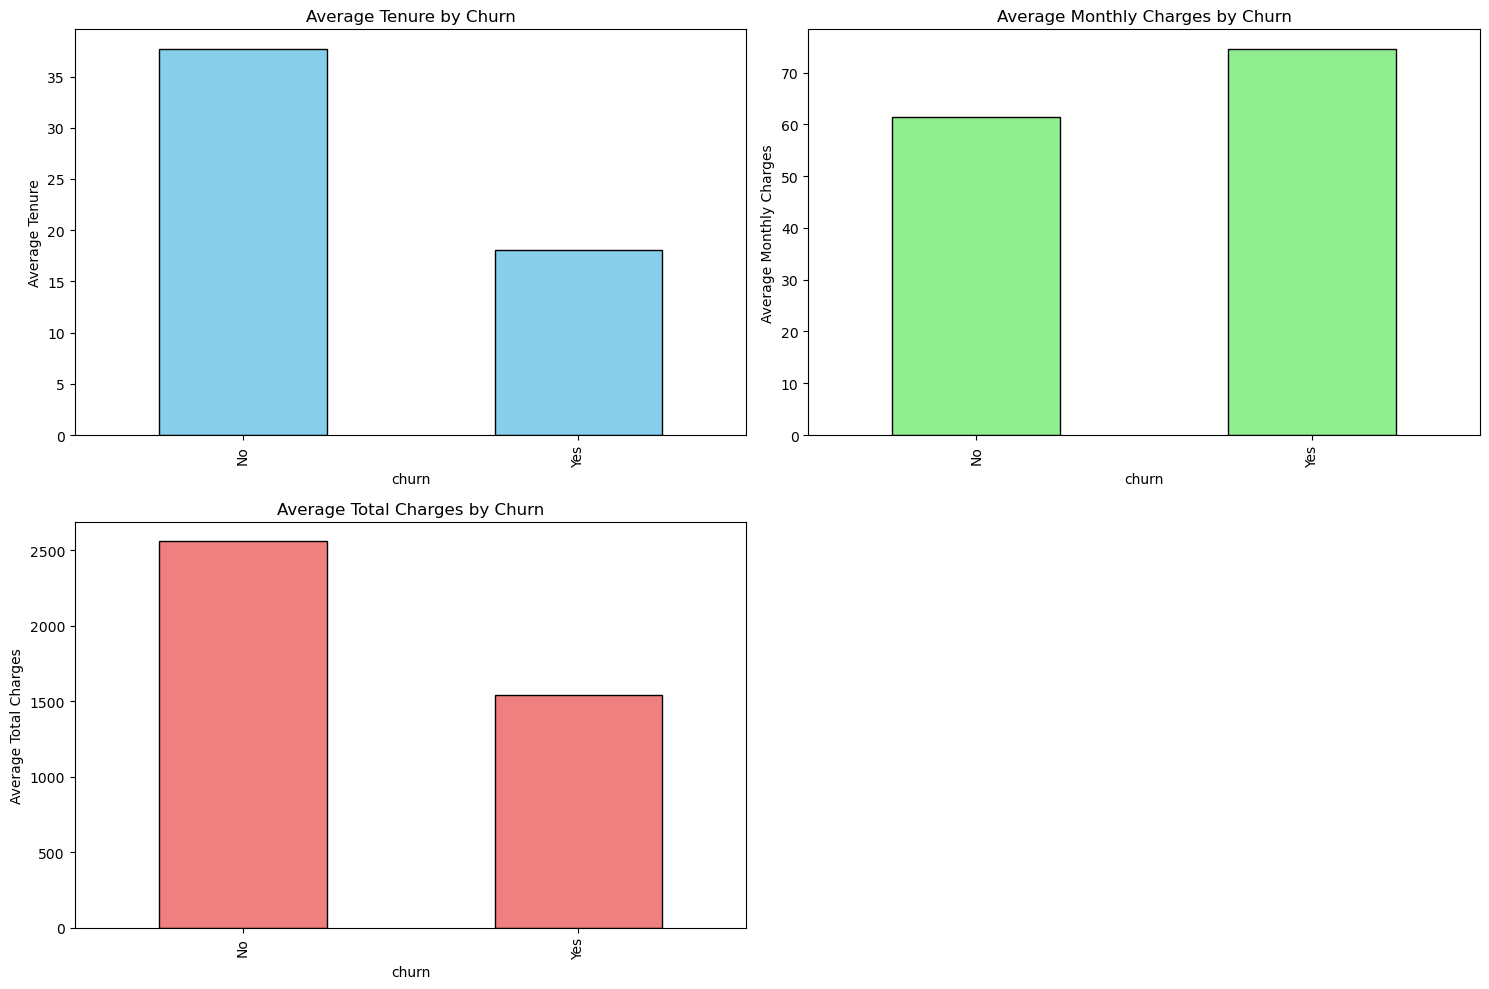

In [119]:
plt.figure(figsize=(15, 10))

# Tenure vs Churn
plt.subplot(2, 2, 1)
telecom_data_cleaned_no_duplicates.groupby('churn')['tenure'].mean().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Tenure by Churn')
plt.ylabel('Average Tenure')

# Monthly Charges vs Churn
plt.subplot(2, 2, 2)
telecom_data_cleaned_no_duplicates.groupby('churn')['monthly_charges'].mean().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Average Monthly Charges by Churn')
plt.ylabel('Average Monthly Charges')

# Total Charges vs Churn
plt.subplot(2, 2, 3)
telecom_data_cleaned_no_duplicates.groupby('churn')['total_charges'].mean().plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Average Total Charges by Churn')
plt.ylabel('Average Total Charges')

plt.tight_layout()
plt.show()


20. After looking at that analysis:
- Tenure: Customers who churn tend to have a much shorter tenure on average compared to those who stay, indicating that newer customers are more likely to leave.
- Monthly Charges: Customers who churn tend to have higher monthly charges on average compared to those who stay, suggesting that higher billing might be a factor contributing to churn.
- Total Charges: Interestingly, the total charges for customers who churn are lower on average, likely because they have shorter tenures and haven’t accumulated as many charges.
- This analysis highlights the significance of tenure and monthly charges in predicting churn. Customers with higher bills and shorter relationships with the company seem to be at higher risk of leaving.

21. Now after looking thorough through the numerical variables and found out possible correlations, the distributions and the trends of when a customer could churn(this will be further explored). It's time to move on to the categorical variables and explore their importance.
22. Let's first begin by answering one of my previois 

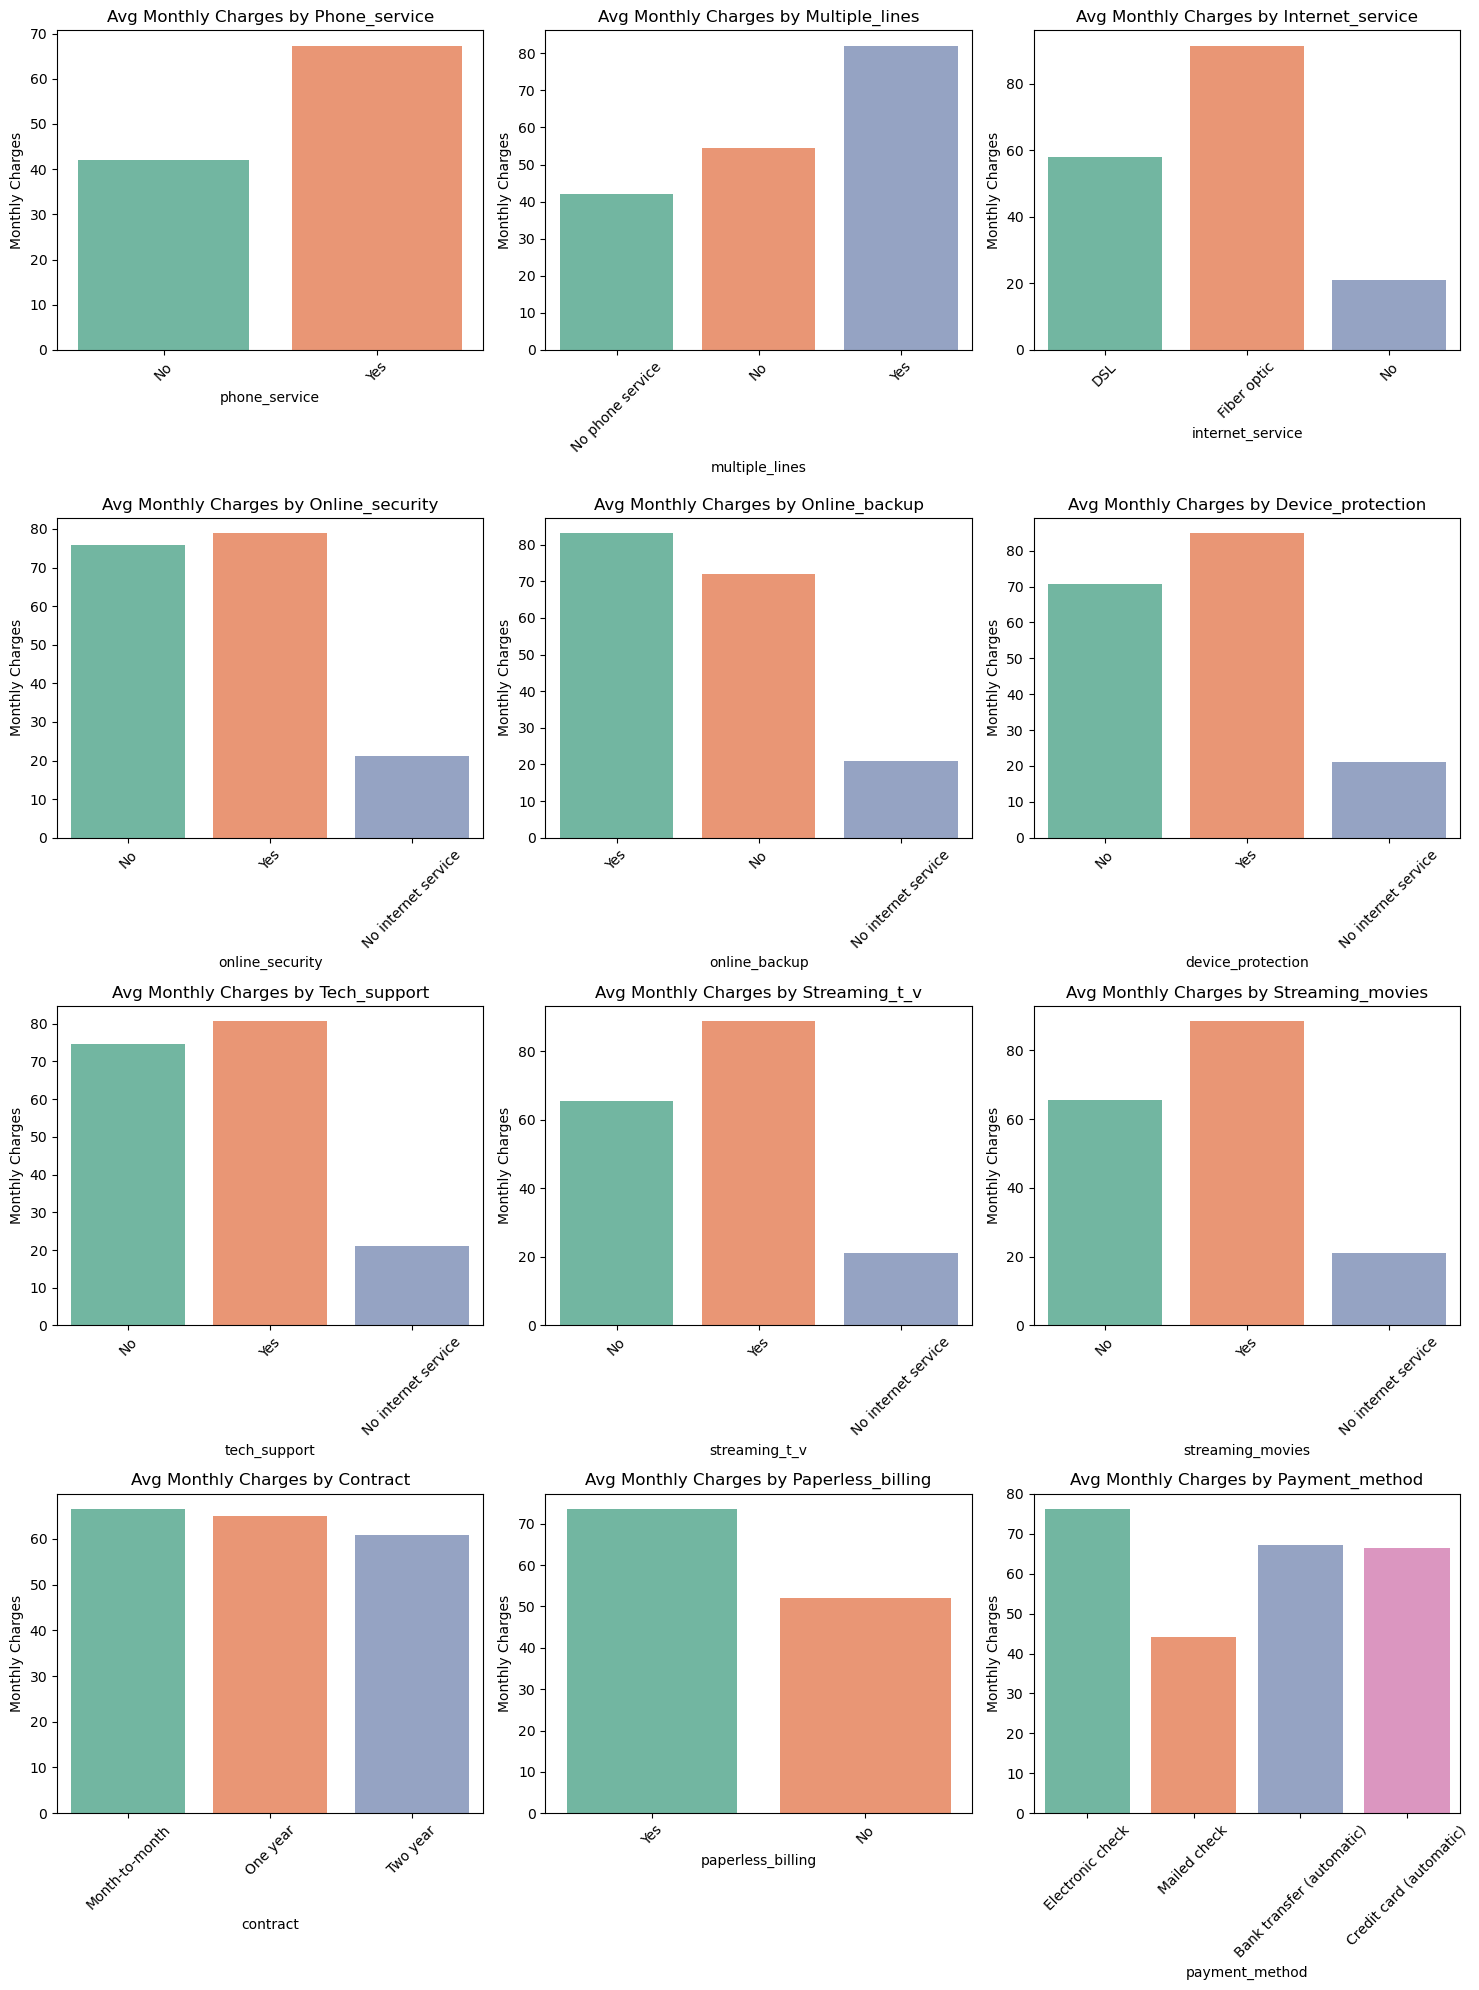

In [62]:
categorical_features_services = ['phone_service', 'multiple_lines', 'internet_service', 'online_security', 
                        'online_backup', 'device_protection', 'tech_support', 'streaming_t_v', 
                        'streaming_movies', 'contract', 'paperless_billing', 'payment_method']

# Set up a grid of 4 rows and 3 columns (adjust rows/cols depending on your need)
fig, axes = plt.subplots(4, 3, figsize=(15, 20))  # 4 rows, 3 columns

# Flatten axes to make it easier to iterate
axes = axes.flatten()

# Loop through each feature and create a bar plot in each subplot
for i, feature in enumerate(categorical_features_services):
    sns.barplot(x=feature, y='monthly_charges', data=telecom_data_cleaned_no_duplicates, ax=axes[i], hue=feature, palette="Set2", errorbar=None, legend=False)
    axes[i].set_title(f'Avg Monthly Charges by {feature.capitalize()}')
    axes[i].set_ylabel('Monthly Charges')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

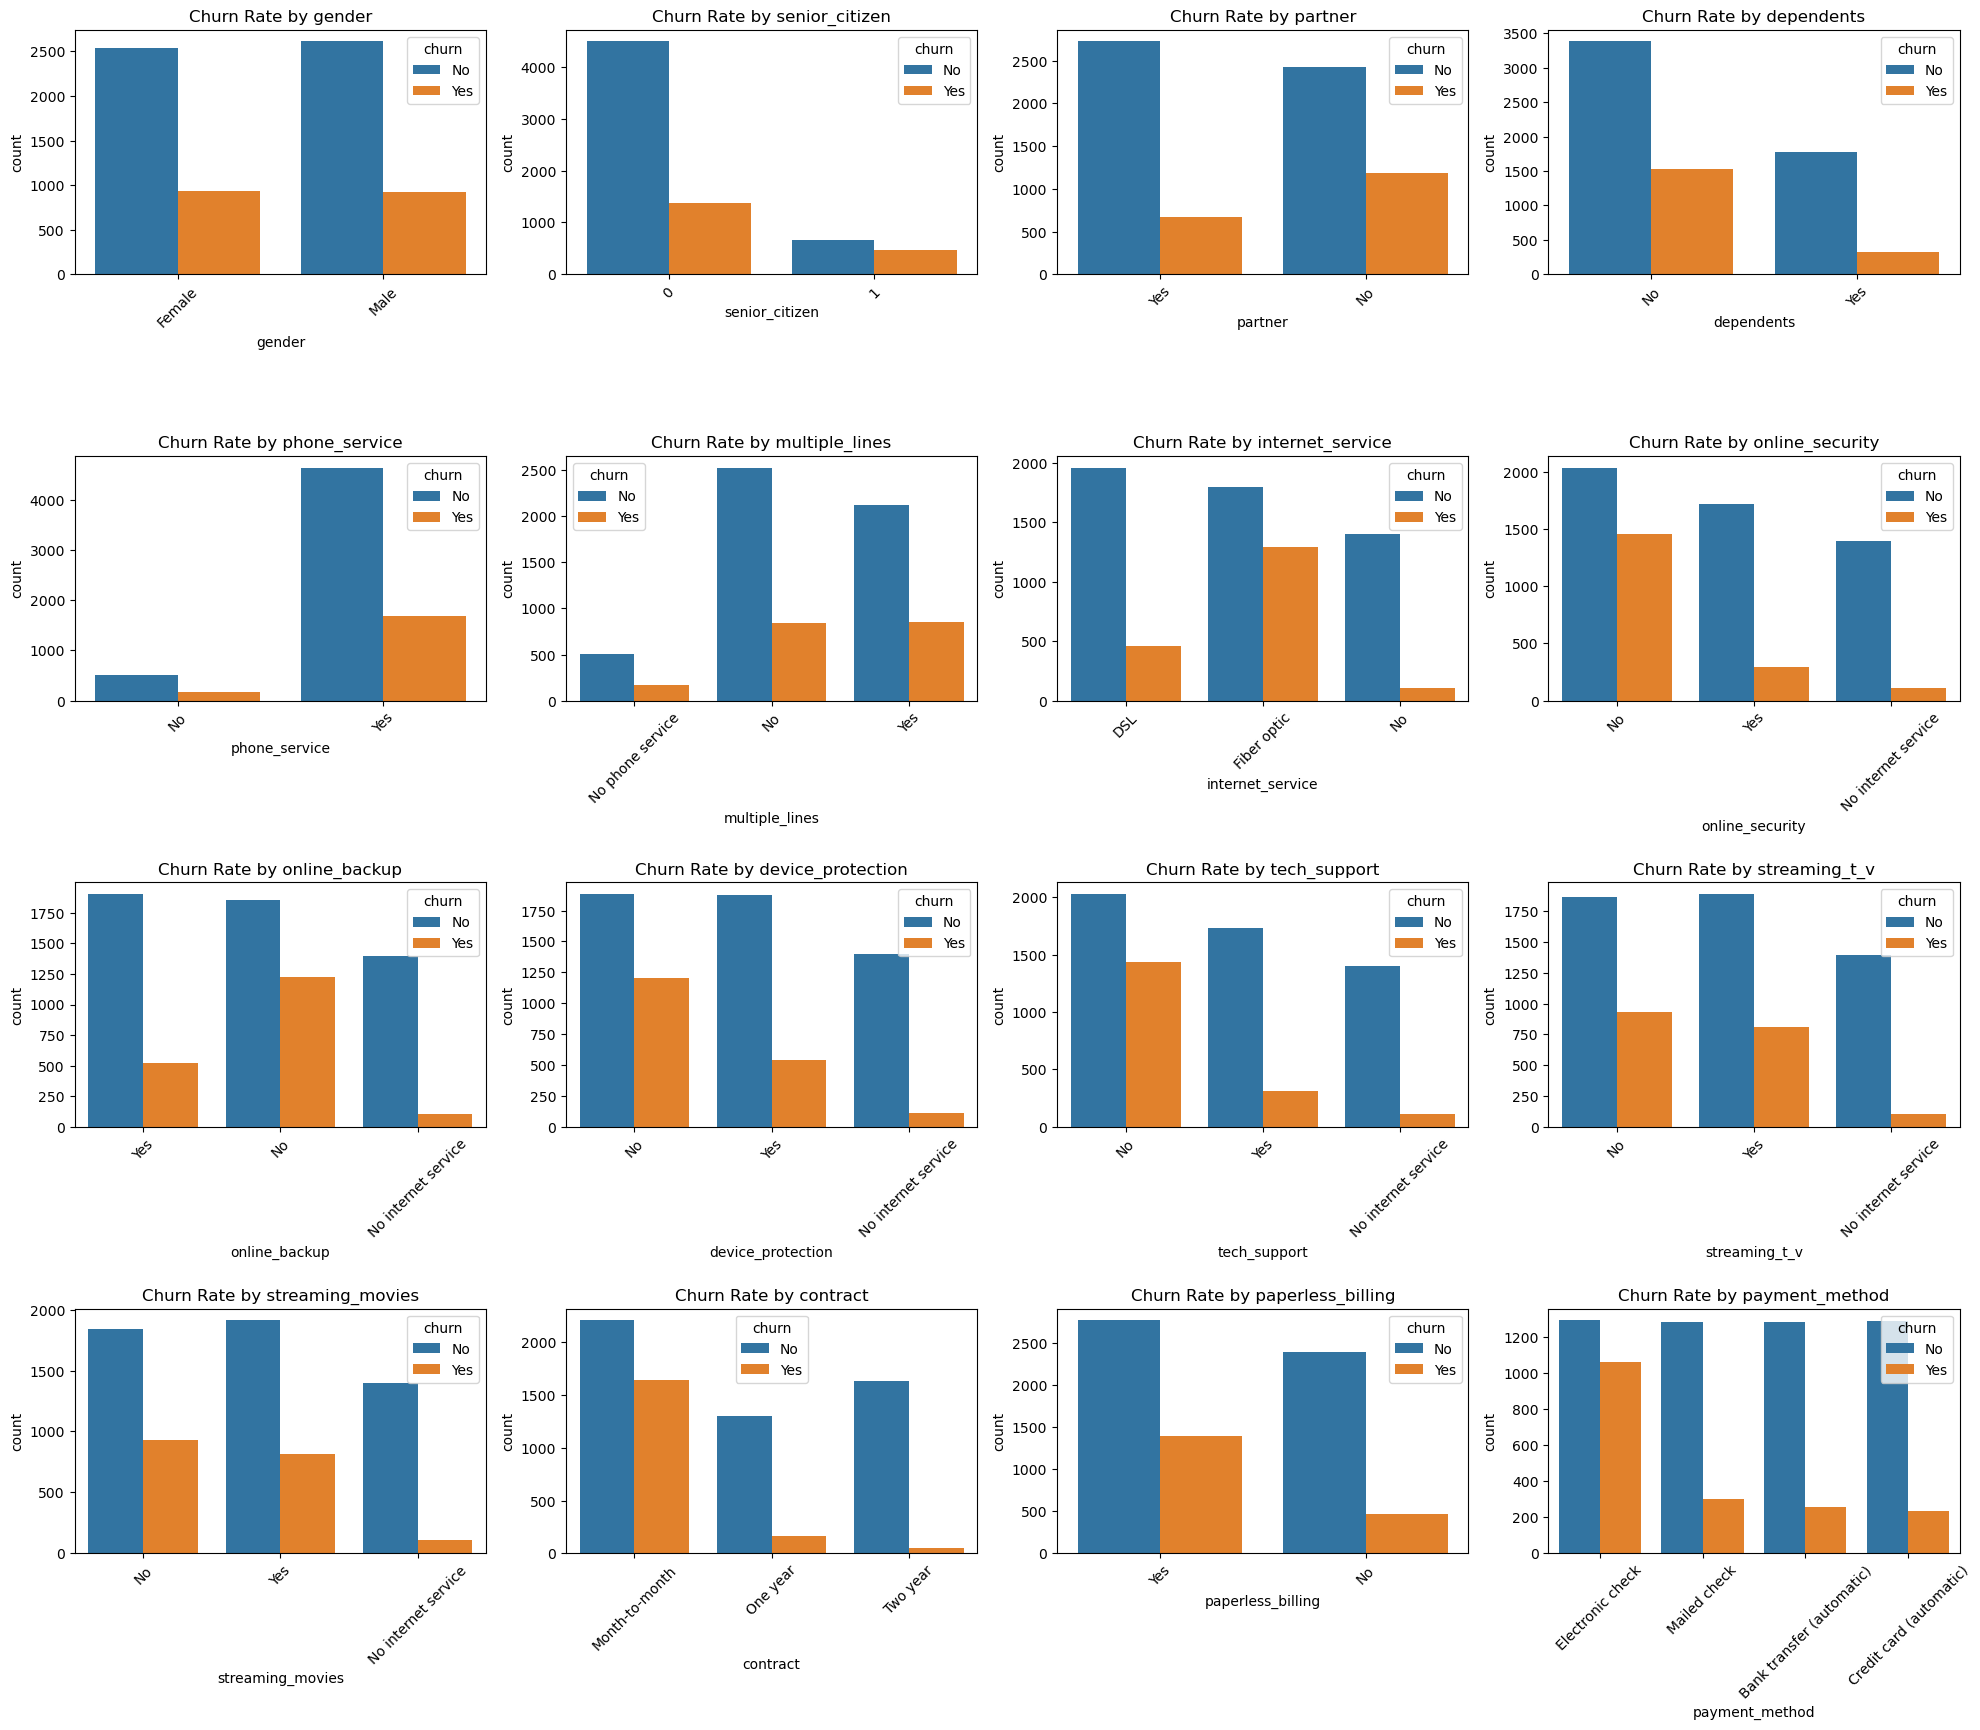

In [63]:
# List of categorical features excluding 'churn'
categorical_features = ['gender', 'senior_citizen', 'partner', 'dependents', 
                        'phone_service', 'multiple_lines', 'internet_service', 
                        'online_security', 'online_backup', 'device_protection', 
                        'tech_support', 'streaming_t_v', 'streaming_movies', 
                        'contract', 'paperless_billing', 'payment_method']

# Plotting churn rate for each categorical variable
plt.figure(figsize=(20, 20))
for i, column in enumerate(categorical_features, 1):
    plt.subplot(5, 4, i)
    sns.countplot(x=column, hue='churn', data=telecom_data_cleaned_no_duplicates)
    plt.title(f'Churn Rate by {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## **References**

[1] Solutions, H. (2024, April 2). Churn Management Basics: How to reduce customer churn. Hitachi Solutions. https://global.hitachi-solutions.com/blog/reduce-customer-churn/#:~:text=Churn%20%E2%80%94%20also%20known%20as%20customer%20churn%2C%20customer%20attrition%2C%20and%20customer%20turnover%20%E2%80%94%20is%20what%20happens%20when%20a%20customer%20ceases%20to%20use%20your%20product%20or%20service%20and%20terminates%20their%20relationship%20with%20your%20company.

[2] El-Abidin, R. (2024, September 25). 50 Customer Retention Statistics to Know. Hubspot. https://blog.hubspot.com/service/statistics-on-customer-retention#:~:text=Acquiring%20new%20customers%20is%20five%20times%20more%20expensive%20than%20retaining%20existing%20customers.

[3] Team, I. (2024, March 21). Churn Rate: What it means, examples, and calculations. Investopedia. https://www.investopedia.com/terms/c/churnrate.asp#:~:text=Churn%20rate%20in%20business,in%20a%20given%20period.

[4] Dzou, C. (2024, August 5). How to predict churn early and increase customer retention. Gong. https://www.gong.io/blog/predicting-churn/#:~:text=Predicting%20customer%20churn%20is%20crucial%20for%20businesses%20because%20it%20allows%20them%20to%20take%20proactive%20measures%20to%20retain%20their%20customer%20base%20and%20improve%20their%20bottom%20line.%C2%A0

[5] Understanding Churn Prediction with Machine Learning | Churned. (n.d.). https://www.churned.io/knowledge-base/understanding-churn-prediction-with-machine-learning#:~:text=Churn%20prediction%20is%20crucial%20for%20businesses%20as%20it%20enables%20them%20to%20identify%20potential%20churn%20risks%20before%20they%20occur.

[6] Prabadevi, B., Shalini, R., & Kavitha, B. (2023). Customer churning analysis using machine learning algorithms. International Journal of Intelligent Networks, 4, 145–154. https://doi.org/10.1016/j.ijin.2023.05.005

[7] Understanding Churn Prediction with Machine Learning | Churned. (n.d.). https://www.churned.io/knowledge-base/understanding-churn-prediction-with-machine-learning#:~:text=Churn%20prediction%20is%20crucial%20for%20businesses%20as%20it%20enables%20them%20to%20identify%20potential%20churn%20risks%20before%20they%20occur.

[8] Wagh, S. K., Andhale, A. A., Wagh, K. S., Pansare, J. R., Ambadekar, S. P., & Gawande, S. (2023). Customer churn prediction in telecom sector using machine learning techniques. Results in Control and Optimization, 14, 100342. https://doi.org/10.1016/j.rico.2023.100342

[9] Ullah I, Raza B, Malik AK, Imran M, Islam SU, Kim SW. A churn prediction model using random forest: analysis of machine learning, techniques for churn prediction and factor identification in telecom sector. IEEE Access May 6/2019. Link: https://ieeexplore.ieee.org/abstract/document/8706988 

[10] Wagh, S. K., Andhale, A. A., Wagh, K. S., Pansare, J. R., Ambadekar, S. P., & Gawande, S. (2023). Customer churn prediction in telecom sector using machine learning techniques. Results in Control and Optimization, 14, 100342. https://doi.org/10.1016/j.rico.2023.100342

[11] Poudel, S. S., Pokharel, S., & Timilsina, M. (2024). Explaining customer churn prediction in telecom industry using tabular machine learning models. Machine Learning With Applications, 17, 100567. https://doi.org/10.1016/j.mlwa.2024.100567

[12] Ahmed, A. A., & Maheswari, D. (2017). Churn prediction on huge telecom data using hybrid firefly based classification. Egyptian Informatics Journal, 18(3), 215–220. https://doi.org/10.1016/j.eij.2017.02.002

[13] Jain, H., Khunteta, A., & Srivastava, S. (2020). Churn Prediction in Telecommunication using Logistic Regression and Logit Boost. Procedia Computer Science, 167, 101–112. https://doi.org/10.1016/j.procs.2020.03.187

[14] Telecom customers. (2024, September 3). Kaggle. https://www.kaggle.com/datasets/tarekmuhammed/telecom-customers/data#:~:text=This%20dataset%20contains,for%20customer%20departure.